# **Problems:**
1.   Cannot return model variable in function(error), so cannot make the model accessible outside the function. 
2.   The value of MSE and MAE is not constant for same model parameters(not sure if its seed problem)




# Modules

In [192]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('drive')
tf.random.set_seed(42)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


#**Regression in 1 function(for N-Models)**

#Data

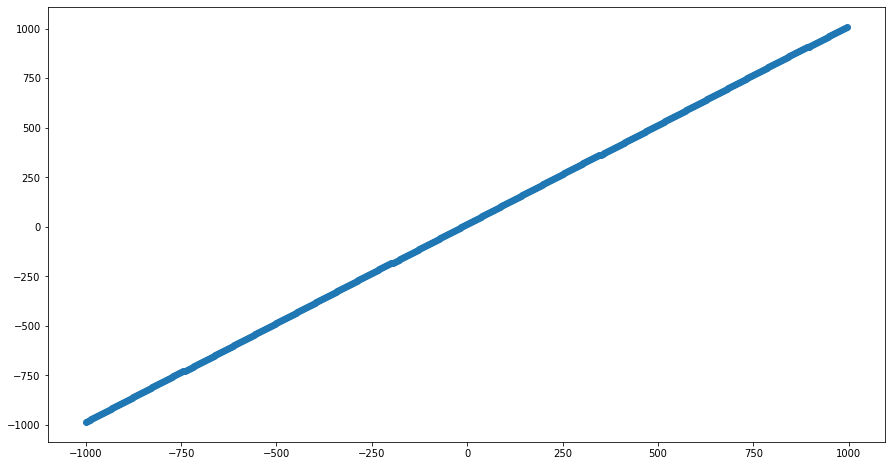

In [193]:
#data
X=tf.range(-1000,1000,5)
y=X+15
plt.figure(figsize=(15,8))
plt.scatter(X,y)

In [194]:
#3sets
print(len(X))
X_train=X[:280]
X_test=X[280:]

y_train=y[:280]
y_test=y[280:]

400


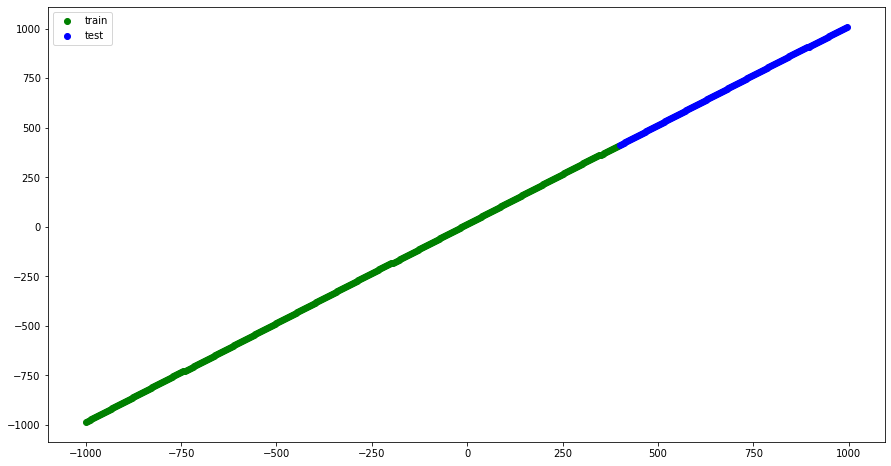

In [195]:
plt.figure(figsize=(15,8))
plt.scatter(X_train,y_train,c="g",label="train")
plt.scatter(X_test,y_test, c="b",label="test")
plt.legend()

# Functions

In [196]:
#Plot
def Plot(X_train,y_train,X_test,y_test,y_pred): 
  plt.figure(figsize=(15,8))
  plt.scatter(X_train,y_train,c="g",label="train")
  plt.scatter(X_test,y_test, c="b",label="test")
  plt.scatter(X_test,y_pred, c="r",label="Prediction")
  plt.legend();

In [197]:
Eval=[["Neural No","Epochs","Mae","Mse"]]
#Evaluation
def evaluation(l,e,y_test,y_pred):
  mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
  mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred)
  l= ' '.join(map(str, l))
  return(list([l,e,mae.numpy(),mse.numpy()]))

In [223]:
def NN(l,e):
  tf.random.set_seed(42)
#Neural Network
  model = tf.keras.Sequential()
#Create
  model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
  for i in range(len(l)):
    model.add(tf.keras.layers.Dense(l[i]))
#Compile
  model.compile(loss=tf.keras.losses.mse,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mse"])
#Fit
  history=model.fit(X_train,y_train,epochs=e,verbose=0)

#Prediction
  y_pred=model.predict(X_test)
  y_pred=tf.squeeze(tf.constant(y_pred[:,0]))

  eval=evaluation(l,e,y_test,y_pred)
  Eval.append(eval)

  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")
  model.summary()
  print(tf.squeeze(model.predict([100000]))[0])

# Neural Network Function
Constants:
  1. Adam Optimizer(lr=0.01)
  2. Activation function for each layer

4/4 [==============================] - 0s 4ms/step
Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_374 (Dense)           (None, 1)                 2         
                                                                 
 dense_375 (Dense)           (None, 100)               200       
                                                                 
 dense_376 (Dense)           (None, 50)                5050      
                                                                 
 dense_377 (Dense)           (None, 2)                 102       
                                                                 
Total params: 5,354
Trainable params: 5,354
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 123ms/step
tf.Tensor(100015.73, shape=(), dtype=float32)


,0,1,2,3
0,Neural No,Epochs,Mae,Mse
1,100,350,26.241365,697.360779
2,100 50,100,25.233175,644.997009
3,100 50 2,100,20.934969,443.410339
4,100 50 2,500,0.005049,0.000027


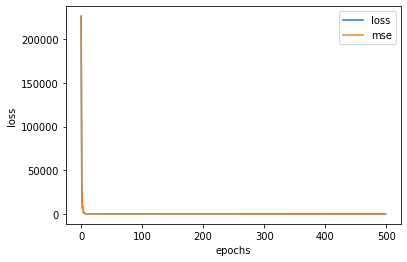

In [230]:
#Click and Add more values to 
tf.random.set_seed(42)
No=[100,50,2]
epoch=500
NN(No,epoch)
pd.DataFrame(Eval)

# Delete Previous value

In [189]:
Eval.pop()

['100 10', 100, 14.501217, 212.32494]

# Clear Table

In [226]:
Eval=[["Neural No","Epochs","Mae","Mse"]]

#Save

In [191]:
#Can't do it separately cause model not globally online.

1/1 [==============================] - 0s 67ms/step
tf.Tensor(1016.17035, shape=(), dtype=float32)
